In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas_bokeh
pandas_bokeh.output_notebook()
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show,output_file,save
# import statsmodels.api as sm
# from scipy import stats as stats
# from sklearn.impute import KNNImputer
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.stats.diagnostic import linear_rainbow
# from sklearn.linear_model import LinearRegression 
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import r2_score,mean_squared_error
# from statsmodels.stats.api import het_goldfeldquandt
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.feature_selection import RFECV 
# import requests

Loading BokehJS ...

In [2]:
covid = pd.read_csv('covid_19_data.csv')

In [3]:
covid.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [4]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.000000,1.724800e+05,172480.000000,1.724800e+05
mean,86240.500000,3.323156e+04,1050.030966,2.102825e+04
std,49790.831552,1.031349e+05,3499.436401,1.156598e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,43120.750000,4.570000e+02,6.000000,1.000000e+01
50%,86240.500000,4.016500e+03,76.000000,8.580000e+02
75%,129360.250000,1.884300e+04,554.000000,7.229000e+03
max,172480.000000,2.290891e+06,54804.000000,5.624444e+06


In [6]:
covid.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     47883
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
india = covid[covid['Country/Region'] == 'India']

In [8]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6744 entries, 430 to 172457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6744 non-null   int64  
 1   ObservationDate  6744 non-null   object 
 2   Province/State   6612 non-null   object 
 3   Country/Region   6744 non-null   object 
 4   Last Update      6744 non-null   object 
 5   Confirmed        6744 non-null   float64
 6   Deaths           6744 non-null   float64
 7   Recovered        6744 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 474.2+ KB


In [9]:
india['Province/State'].unique()

array([nan, 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Unknown', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep'], dtype=object)

In [10]:
india.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     132
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [11]:
india['Province/State'] = india['Province/State'].fillna(value = "Unknown")

<ipython-input-11-33d2635e1cde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Province/State'] = india['Province/State'].fillna(value = "Unknown")


In [12]:
india.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [13]:
india['Province/State'].unique()

array(['Unknown', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep'], dtype=object)

In [14]:
india['Province/State'].value_counts()

Unknown                                     312
Punjab                                      180
Gujarat                                     180
Himachal Pradesh                            180
Uttar Pradesh                               180
Bihar                                       180
Rajasthan                                   180
Delhi                                       180
West Bengal                                 180
Nagaland                                    180
Uttarakhand                                 180
Mizoram                                     180
Andaman and Nicobar Islands                 180
Odisha                                      180
Puducherry                                  180
Arunachal Pradesh                           180
Tamil Nadu                                  180
Meghalaya                                   180
Jammu and Kashmir                           180
Assam                                       180
Chandigarh                              

In [15]:
india['Province/State'].replace({'Other': 'Unknown'}, inplace=True)

/home/harrish/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
india['Province/State'].value_counts()

Unknown                                     312
Punjab                                      180
Gujarat                                     180
Himachal Pradesh                            180
Uttar Pradesh                               180
Bihar                                       180
Rajasthan                                   180
Delhi                                       180
West Bengal                                 180
Nagaland                                    180
Uttarakhand                                 180
Mizoram                                     180
Andaman and Nicobar Islands                 180
Odisha                                      180
Puducherry                                  180
Arunachal Pradesh                           180
Tamil Nadu                                  180
Meghalaya                                   180
Jammu and Kashmir                           180
Assam                                       180
Chandigarh                              

In [17]:
india['Deaths'].sum()

13535890.0

In [18]:
india.describe()

,SNo,Confirmed,Deaths,Recovered
count,6744.000000,6.744000e+03,6744.000000,6.744000e+03
mean,103824.004300,1.236098e+05,2007.101127,1.055767e+05
std,40237.870184,2.425148e+05,5370.063472,2.161938e+05
min,431.000000,0.000000e+00,0.000000,0.000000e+00
25%,70428.250000,3.439500e+03,17.750000,2.498500e+03
50%,104275.500000,2.283100e+04,306.000000,1.582850e+04
75%,138231.750000,1.412872e+05,1533.000000,1.150465e+05
max,172458.000000,1.852266e+06,47734.000000,1.723370e+06


In [19]:
india['Province/State'].replace({"Ladakh": "Jammu and Kashmir"}, inplace=True)

/home/harrish/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
india.corr()

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.347926,0.211701,0.373770
Confirmed,0.347926,1.000000,0.911827,0.994451
Deaths,0.211701,0.911827,1.000000,0.889060
Recovered,0.373770,0.994451,0.889060,1.000000


In [21]:
india['ObservationDate'] = pd.to_datetime(india['ObservationDate'])

<ipython-input-21-d15d9787b241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['ObservationDate'] = pd.to_datetime(india['ObservationDate'])


In [22]:
india = india.drop('Country/Region' ,axis = 1)

In [23]:
confirmed_cases = pd.DataFrame(india.groupby(['Province/State'])['Confirmed'].nth(-1))
death_cases = pd.DataFrame(india.groupby(['Province/State'])['Deaths'].nth(-1))
recovered_cases = pd.DataFrame(india.groupby(['Province/State'])['Recovered'].nth(-1))

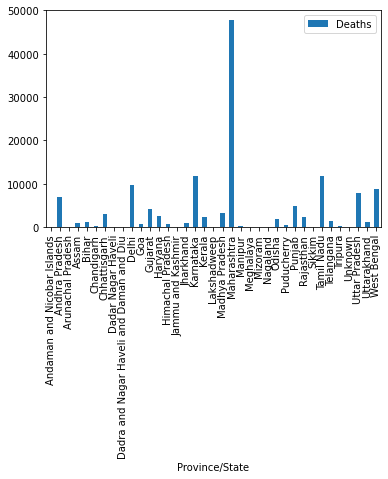

In [24]:
death_cases.plot(kind = 'bar')

In [25]:
india['Active'] = india["Confirmed"] - (india["Deaths"]+india["Recovered"])

In [26]:
active_cases = pd.DataFrame(india.groupby(['Province/State'])['Active'].nth(-1))

In [27]:
active_cases = active_cases.sort_values('Province/State')

In [28]:
active_cases.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Unknown', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='Province/State')

In [29]:
death_cases = death_cases.sort_values('Province/State')

In [30]:
recovered_cases = recovered_cases.sort_values('Province/State')
confirmed_cases = confirmed_cases.sort_values('Province/State')

In [31]:
data = {'Province/State': active_cases.index, 'Confirmed': confirmed_cases['Confirmed'].values,
       'Active': active_cases['Active'].values,'Recovered':recovered_cases['Recovered'].values,
       'Death': death_cases['Deaths'].values}
state_wise = pd.DataFrame.from_dict(data)

In [32]:
state_wise

,Province/State,Confirmed,Active,Recovered,Death
0,Andaman and Nicobar Islands,4758.0,73.0,4624.0,61.0
1,Andhra Pradesh,871972.0,5910.0,859029.0,7033.0
2,Arunachal Pradesh,16395.0,735.0,15605.0,55.0
3,Assam,213759.0,3552.0,209214.0,993.0
4,Bihar,238106.0,5563.0,231248.0,1295.0
5,Chandigarh,18027.0,922.0,16814.0,291.0
6,Chhattisgarh,246809.0,20048.0,223772.0,2989.0
7,Dadar Nagar Haveli,22.0,20.0,2.0,0.0
8,Dadra and Nagar Haveli and Daman and Diu,3342.0,14.0,3326.0,2.0
9,Delhi,592250.0,24693.0,557914.0,9643.0


In [33]:
total_active = state_wise['Active'].sum()
total_confirmed = state_wise['Confirmed'].sum()
total_recovered = state_wise['Recovered'].sum()
total_deaths = state_wise['Death'].sum()

In [34]:
values = [total_active,total_confirmed,total_recovered,total_deaths]
labels = ['Active','Confirmed','Recovered','Deaths']

In [35]:
explode = [0,0.1,0,0]

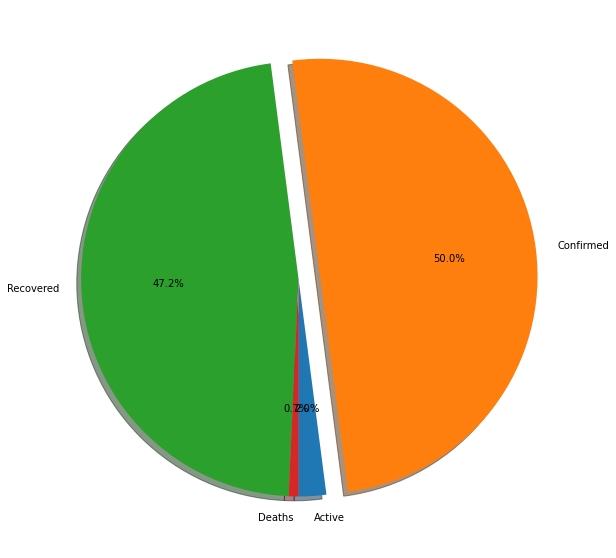

In [70]:
plt.figure(figsize=(15,10))
plt.pie(values, labels=labels, shadow=True,explode=explode, startangle=270,autopct='%1.1f%%');

In [37]:
import geopandas as gpd

In [38]:
df_map = gpd.read_file("states_india.shp")

In [39]:
df_map

,cartodb_id,state_code,st_nm,geometry
0,1,0,Telangana,"POLYGON ((78.34088 19.88362, 78.35133 19.88184..."
1,2,35,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16..."
3,4,12,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
5,6,10,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
6,8,22,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
7,10,25,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,11,30,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,12,24,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


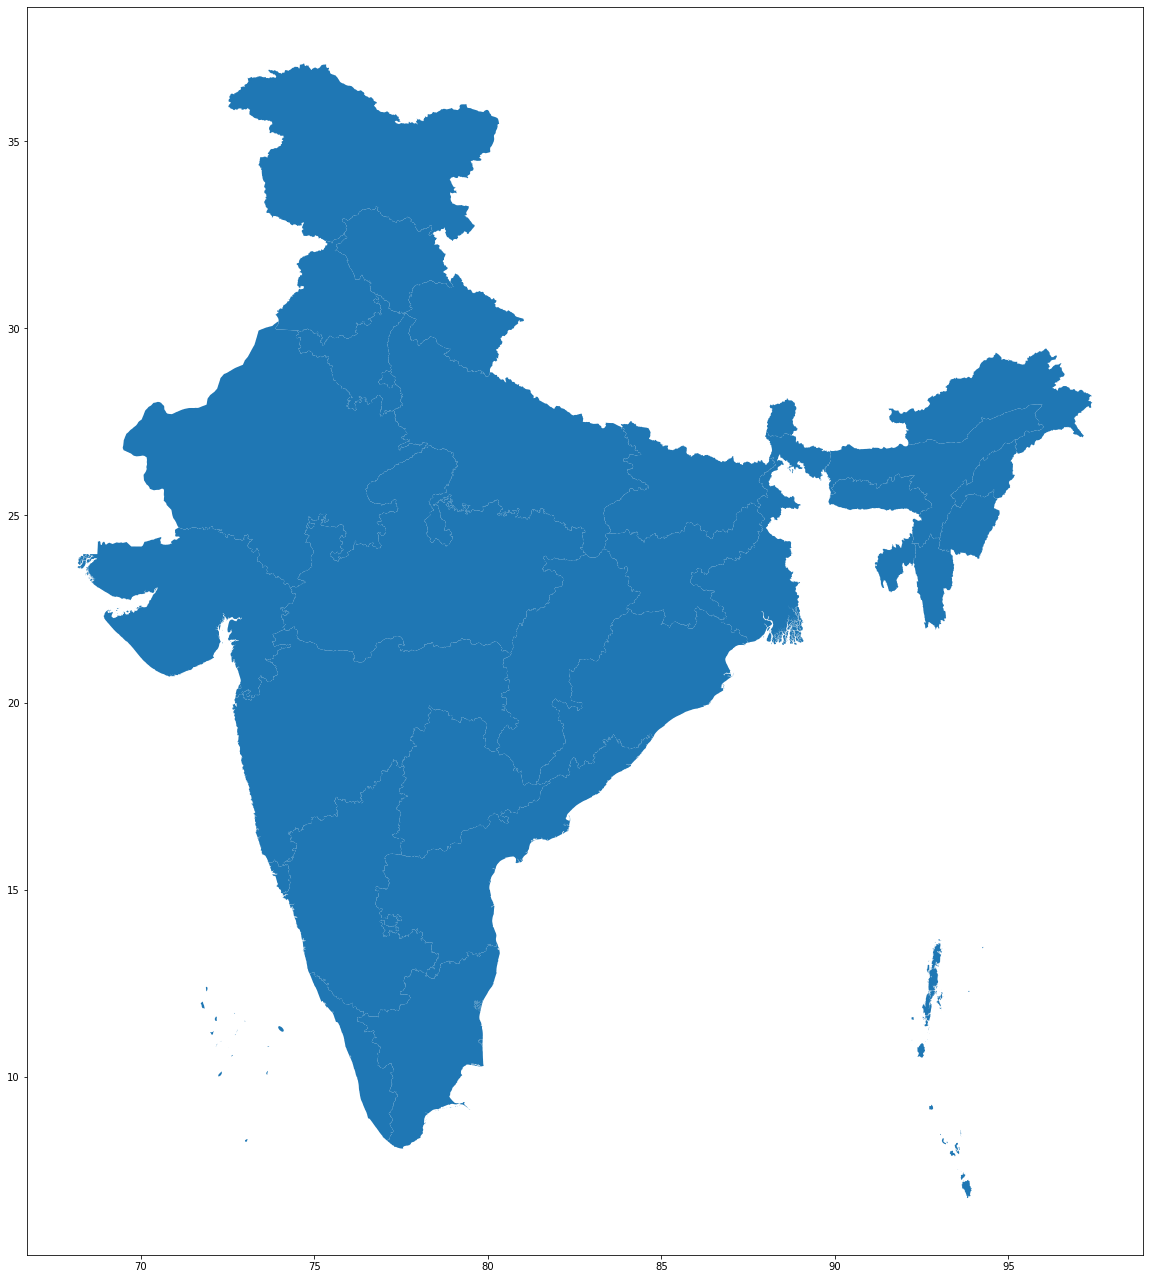

In [40]:
df_map.plot(figsize = (20,30))

In [41]:
df_map["st_nm"][df_map['st_nm'] == "NCT of Delhi"] = "Delhi"
df_map = df_map.sort_values("st_nm")

<ipython-input-41-46cf68fca542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map["st_nm"][df_map['st_nm'] == "NCT of Delhi"] = "Delhi"


In [42]:
state_wise['Province/State'].replace({"Dadar Nagar Haveli": "Dadara & Nagar Havelli"}, inplace=True)
state_wise['Province/State'].replace({"Telangana": "Telengana"}, inplace=True)
state_wise['Province/State'].replace({"Dadra and Nagar Haveli and Daman and Diu": "Daman & Diu"}, inplace=True)

In [43]:
state_wise

,Province/State,Confirmed,Active,Recovered,Death
0,Andaman and Nicobar Islands,4758.0,73.0,4624.0,61.0
1,Andhra Pradesh,871972.0,5910.0,859029.0,7033.0
2,Arunachal Pradesh,16395.0,735.0,15605.0,55.0
3,Assam,213759.0,3552.0,209214.0,993.0
4,Bihar,238106.0,5563.0,231248.0,1295.0
5,Chandigarh,18027.0,922.0,16814.0,291.0
6,Chhattisgarh,246809.0,20048.0,223772.0,2989.0
7,Dadara & Nagar Havelli,22.0,20.0,2.0,0.0
8,Daman & Diu,3342.0,14.0,3326.0,2.0
9,Delhi,592250.0,24693.0,557914.0,9643.0


In [44]:
df_map["st_nm"][df_map["st_nm"] == "Jammu & Kashmir"] = "Jammu and Kashmir"
df_map["st_nm"][df_map["st_nm"] == "Andaman & Nicobar Island"] = "Andaman and Nicobar Islands"
df_map["st_nm"][df_map["st_nm"] == "Telangana"] = "Telengana"
df_map["st_nm"][df_map["st_nm"] == "Arunanchal Pradesh"] = "Arunachal Pradesh"

<ipython-input-44-f34a7d2022c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map["st_nm"][df_map["st_nm"] == "Jammu & Kashmir"] = "Jammu and Kashmir"
<ipython-input-44-f34a7d2022c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map["st_nm"][df_map["st_nm"] == "Andaman & Nicobar Island"] = "Andaman and Nicobar Islands"
<ipython-input-44-f34a7d2022c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map["st_nm"][df_map["s

In [45]:
df_map

,cartodb_id,state_code,st_nm,geometry
1,2,35,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16..."
3,4,12,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
5,6,10,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
20,7,4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
6,8,22,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
31,9,26,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,10,25,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
35,26,7,Delhi,"POLYGON ((77.09361 28.86940, 77.10973 28.86722..."


In [46]:
state_wise_confirmed = state_wise[state_wise["Province/State"]!="Unknown"][["Province/State","Confirmed"]]

In [47]:
state_wise_recovered = state_wise[state_wise["Province/State"]!="Unknown"][["Province/State","Recovered"]]
state_wise_active = state_wise[state_wise["Province/State"]!="Unknown"][["Province/State","Active"]]
state_wise_death = state_wise[state_wise["Province/State"]!="Unknown"][["Province/State","Death"]]


In [48]:
state_wise_confirmed.shape

(36, 2)

In [49]:
df_map

,cartodb_id,state_code,st_nm,geometry
1,2,35,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16..."
3,4,12,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
5,6,10,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
20,7,4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
6,8,22,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
31,9,26,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,10,25,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
35,26,7,Delhi,"POLYGON ((77.09361 28.86940, 77.10973 28.86722..."


In [50]:
df_map.shape

(36, 4)

In [51]:
state_wise_confirmed.shape

(36, 2)

In [52]:
merged_df = df_map.set_index('st_nm').join(state_wise_confirmed.set_index('Province/State'))
merged_df['Province/State'] = state_wise_active['Province/State'].values
merged_df = pd.merge(merged_df,state_wise_active,on='Province/State')
merged_df = pd.merge(merged_df,state_wise_death,on='Province/State')
merged_df = pd.merge(merged_df,state_wise_recovered,on='Province/State')

In [53]:
merged_df

,cartodb_id,state_code,geometry,Confirmed,Province/State,Active,Death,Recovered
0,2,35,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",4758.0,Andaman and Nicobar Islands,73.0,61.0,4624.0
1,3,28,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16...",871972.0,Andhra Pradesh,5910.0,7033.0,859029.0
2,4,12,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",16395.0,Arunachal Pradesh,735.0,55.0,15605.0
3,5,18,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",213759.0,Assam,3552.0,993.0,209214.0
4,6,10,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",238106.0,Bihar,5563.0,1295.0,231248.0
5,7,4,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",18027.0,Chandigarh,922.0,291.0,16814.0
6,8,22,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",246809.0,Chhattisgarh,20048.0,2989.0,223772.0
7,9,26,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",22.0,Dadara & Nagar Havelli,20.0,0.0,2.0
8,10,25,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",3342.0,Daman & Diu,14.0,2.0,3326.0
9,26,7,"POLYGON ((77.09361 28.86940, 77.10973 28.86722...",592250.0,Delhi,24693.0,9643.0,557914.0


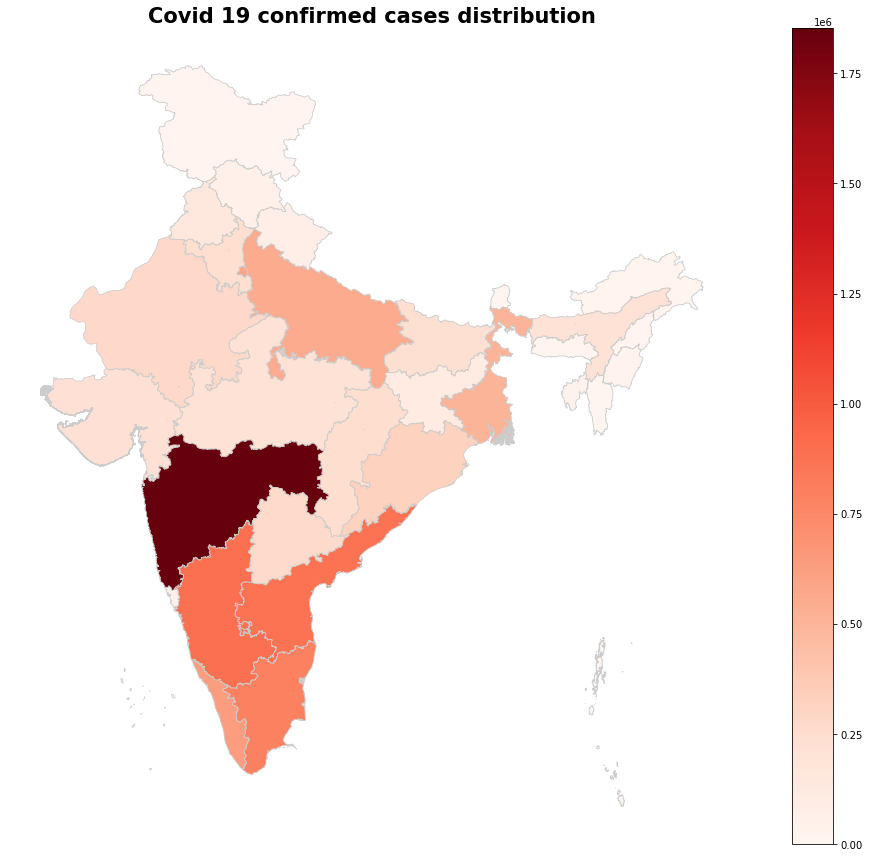

In [54]:
p, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title('Covid 19 confirmed cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Confirmed', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
plt.show()

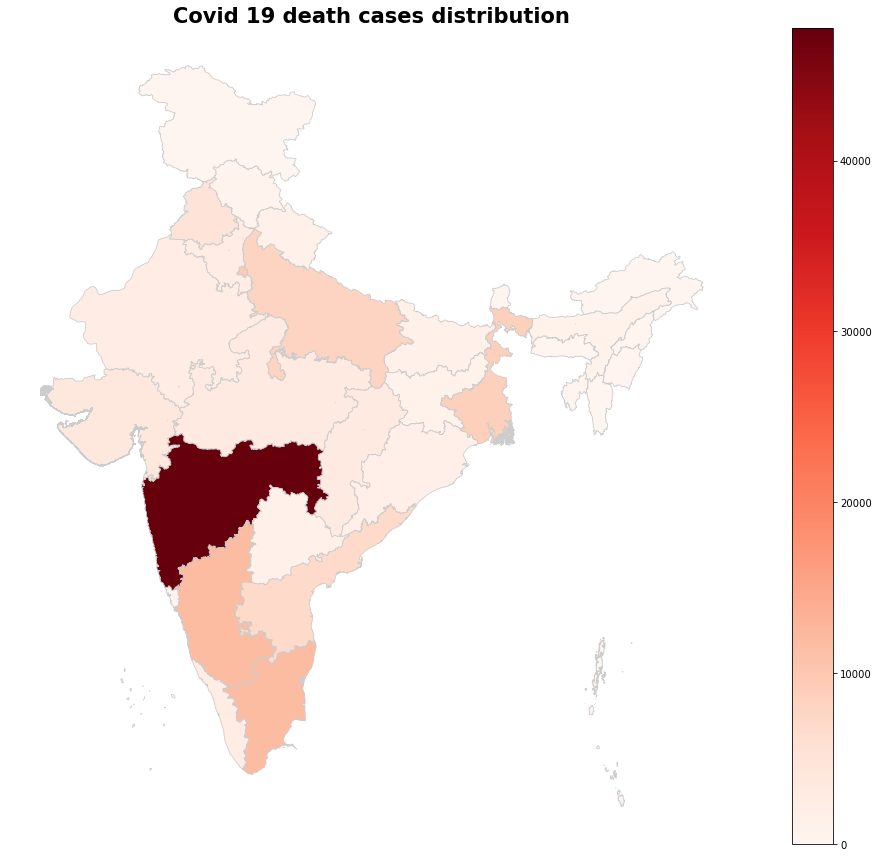

In [55]:
p, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title('Covid 19 death cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Death', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
plt.show()

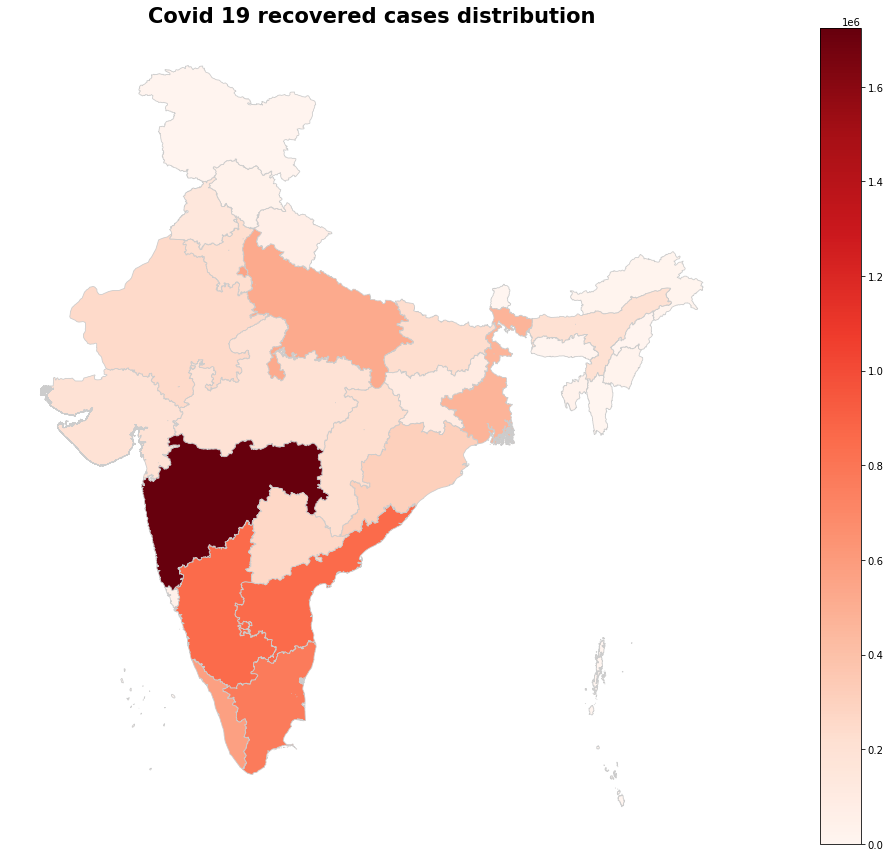

In [56]:
p, ax = plt.subplots(1, figsize=(30, 15))
ax.set_title('Covid 19 recovered cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Recovered', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
plt.show()

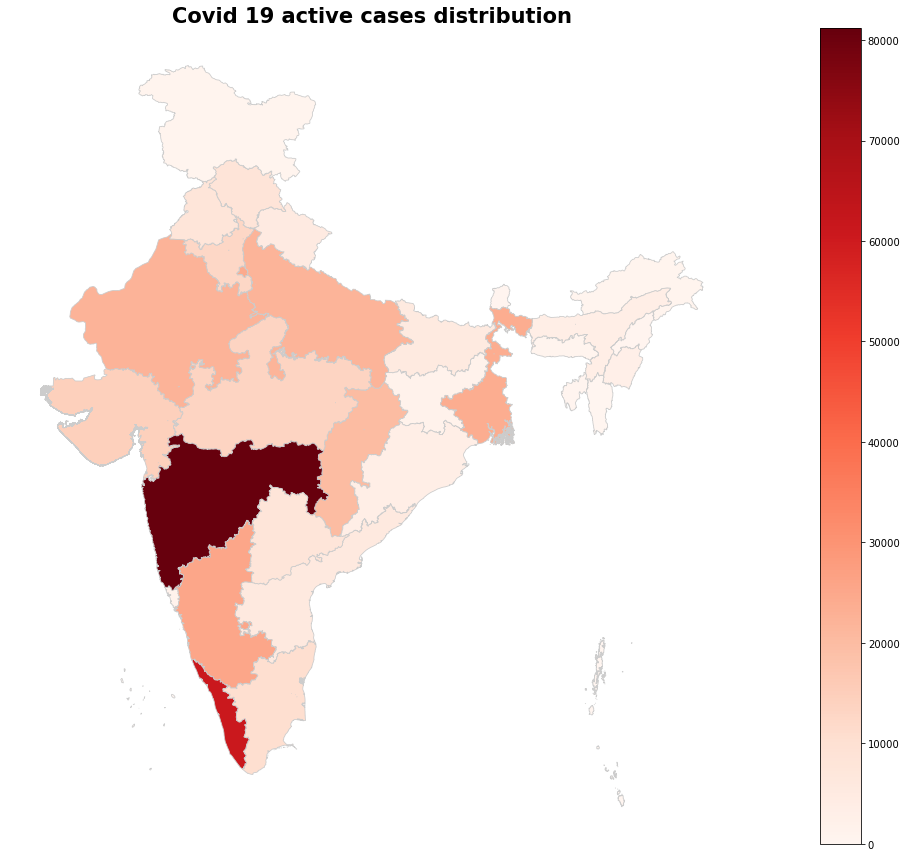

In [57]:
p, ax = plt.subplots(1, figsize=(30, 15))
ax.set_title('Covid 19 active cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Active', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
plt.show()

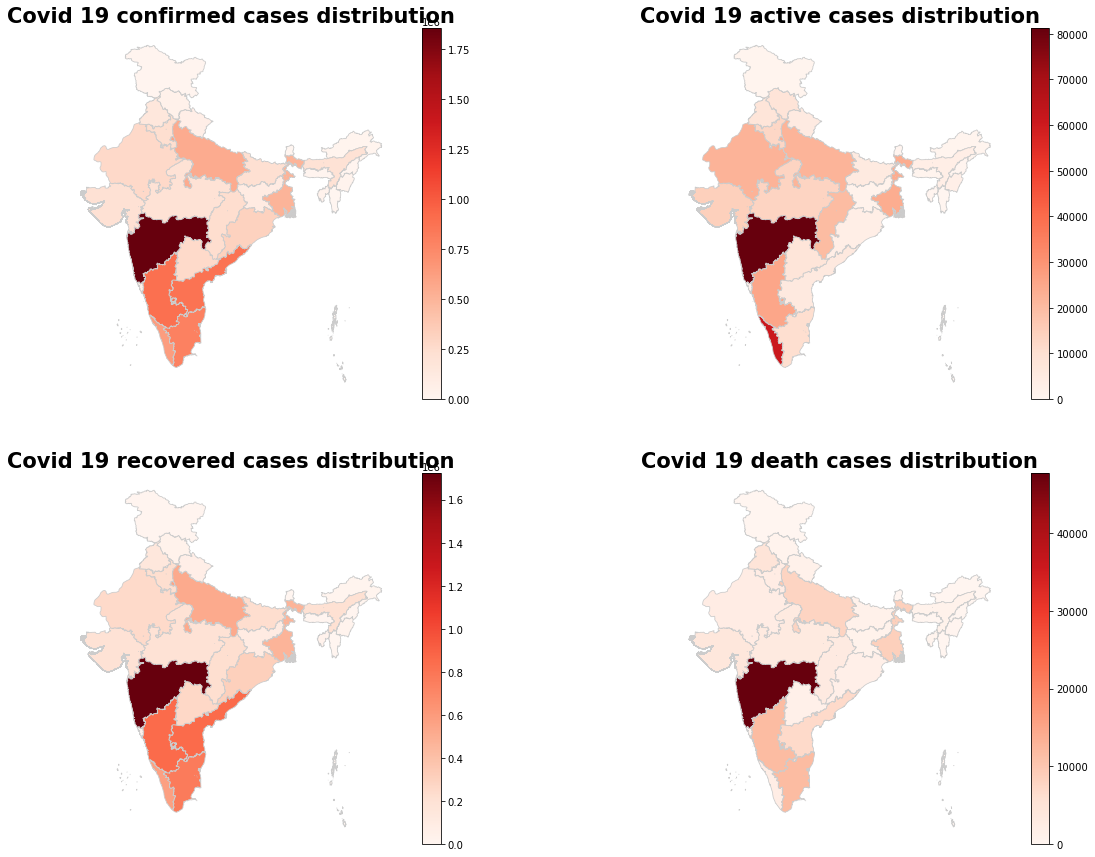

In [58]:
p, ax = plt.subplots(2,2, figsize=(20, 15))
ax[0,0].set_title('Covid 19 confirmed cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Confirmed', cmap='Reds', linewidth=0.8, ax=ax[0,0], edgecolor='0.8', legend=True)
ax[0,0].axis('off')
ax[0,1].set_title('Covid 19 active cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Active', cmap='Reds', linewidth=0.8, ax=ax[0,1], edgecolor='0.8', legend=True)
ax[0,1].axis('off')
ax[1,0].set_title('Covid 19 recovered cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Recovered', cmap='Reds', linewidth=0.8, ax=ax[1,0], edgecolor='0.8', legend=True)
ax[1,0].axis('off')
ax[1,1].set_title('Covid 19 death cases distribution', fontdict={'fontsize': '21', 'fontweight' : '1000'})
merged_df.plot(column='Death', cmap='Reds', linewidth=0.8, ax=ax[1,1], edgecolor='0.8', legend=True)
ax[1,1].axis('off')
plt.show()

In [59]:
output_file("covid_cases.html")
fig1 = merged_df.plot_bokeh(
    title="Confirmed cases",
    figsize=(900, 600),
    simplify_shapes=5000,
    category="Confirmed",
    show_colorbar=True,
    colormap=["blue", "yellow", "green", "red"],
    hovertool_columns=["Province/State","Confirmed"],
    tile_provider="CARTODBPOSITRON")
fig2 = merged_df.plot_bokeh(
    title="Active cases",
    figsize=(900, 600),
    simplify_shapes=5000,
    category="Active",
    show_colorbar=True,
    colormap=["blue", "yellow", "green", "red"],
    hovertool_columns=["Province/State","Active"],
    tile_provider="CARTODBPOSITRON")
fig3 = merged_df.plot_bokeh(
    title="Recovered cases",
    figsize=(900, 600),
    simplify_shapes=5000,
    category="Recovered",
    show_colorbar=True,
    colormap=["blue", "yellow", "green", "red"],
    hovertool_columns=["Province/State","Recovered"],
    tile_provider="CARTODBPOSITRON")
fig4 = merged_df.plot_bokeh(
    title="Death cases",
    figsize=(900, 600),
    simplify_shapes=5000,
    category="Death",
    show_colorbar=True,
    colormap=["blue", "yellow", "green", "red"],
    hovertool_columns=["Province/State","Death"],
    tile_provider="CARTODBPOSITRON")
p = gridplot([[fig1, fig2],[fig3, fig4]])
show(p)

In [60]:
output_file("output_file_name.html")
save(p)

'/home/harrish/Greatlakes_Dse/PersonalWorkspace/output_file_name.html'

In [61]:
covid[(covid['Country/Region'] == 'India') & (covid['Province/State'] == "Tamil Nadu")]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
39338,39339,06/10/2020,Tamil Nadu,India,2020-06-11 03:33:41,34914.0,307.0,18325.0
40066,40067,06/11/2020,Tamil Nadu,India,2020-06-12 05:09:52,38716.0,349.0,20705.0
40796,40797,06/12/2020,Tamil Nadu,India,2020-06-13 03:33:14,38716.0,349.0,20705.0
41526,41527,06/13/2020,Tamil Nadu,India,2020-06-14 03:33:15,40698.0,367.0,22047.0
42256,42257,06/14/2020,Tamil Nadu,India,2020-06-15 03:33:14,42687.0,397.0,23409.0
...,...,...,...,...,...,...,...,...
169343,169344,12/02/2020,Tamil Nadu,India,2020-12-03 05:28:22,784747.0,11733.0,762015.0
170103,170104,12/03/2020,Tamil Nadu,India,2020-12-04 05:27:27,786163.0,11747.0,763428.0
170863,170864,12/04/2020,Tamil Nadu,India,2020-12-05 05:27:36,787554.0,11762.0,764854.0
171623,171624,12/05/2020,Tamil Nadu,India,2020-12-06 05:26:18,788920.0,11777.0,766261.0
